In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('/content/fifa21 raw data v2.csv')
data

<ipython-input-6-1c188dd62cb4>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [7]:
df = pd.DataFrame(data)
df.head()
column_list = list(df.columns)
print(column_list)

['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits']


In [8]:
df.drop(columns=['photoUrl', 'playerUrl'], inplace=True)
df.duplicated().sum()
df = df.rename(columns={'LongName': 'Player'})
df = df.rename(columns={'↓OVA':'OVA'})
df = df.rename(columns={'Team & Contract':'Club'})
df['Club'] = df['Club'].str.replace('\n', '')
df[['Club','OVA']]

,Club,OVA
0,FC Barcelona,93
1,Juventus,92
2,Atlético Madrid,91
3,Manchester City,91
4,Paris Saint-Germain,91
...,...,...
18974,Wuhan Zall,47
18975,Oldham Athletic,47
18976,Derry City,47
18977,Dalian YiFang FC,47


In [9]:
def hits_numeric(value):
    if isinstance(value, str):
        value = value.lower().strip()  # Convert to lowercase and strip spaces
        if 'm' in value:
            return float(value.replace('m', '').strip()) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1000
        else:
            try:
                return float(value)
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return value

df['Hits'] = df['Hits'].apply(hits_numeric)

# Convert 'Hits' to integer, handling NaN cases
df['Hits'] = df['Hits'].dropna().astype('int64')

# Display the cleaned 'Hits' column
print(df['Hits'])

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
18974      NaN
18975      NaN
18976      NaN
18977      NaN
18978      NaN
Name: Hits, Length: 18979, dtype: float64


In [10]:
df.duplicated().sum()
df.isna().sum()

,0
ID,0
Name,0
Player,0
Nationality,0
Age,0
...,...
PAS,0
DRI,0
DEF,0
PHY,0


In [12]:
datatypes = df.dtypes
df[['Height','Weight']]

,Height,Weight
0,170cm,72kg
1,187cm,83kg
2,188cm,87kg
3,181cm,70kg
4,175cm,68kg
...,...,...
18974,178cm,66kg
18975,175cm,65kg
18976,179cm,74kg
18977,175cm,69kg


In [13]:
df['Height'] = df['Height'].str.strip()
df['Weight'] = df['Weight'].str.strip()

In [14]:
def convert_height(height):
    if isinstance(height, str):  # Check if height is a string
        if 'cm' in height:
            return float(height.replace('cm', '').strip())
        elif "'" in height and '"' in height:
            # Extract feet and inches
            feet, inches = height.split("'")
            inches = inches.replace('"', '').strip()  # Remove the quotation mark
            feet = float(feet.strip())
            inches = float(inches)
            # Convert feet and inches to cm
            return (feet * 12 + inches) * 2.54
        else:
            return np.nan
    elif isinstance(height, (int, float)): # Handle cases where height is already numeric
        return height
    else:
        return np.nan


df['Height'] = df['Height'].apply(convert_height)

# Convert 'Height' column to integers (handling potential NaNs)
df['Height'] = df['Height'].round().astype('Int64')  # Round float values before converting to Int64
df = df.dropna(subset=['Height'])

df[['Height']].astype('int64')
df[['Height','Weight']]

,Height,Weight
0,170,72kg
1,187,83kg
2,188,87kg
3,181,70kg
4,175,68kg
...,...,...
18974,178,66kg
18975,175,65kg
18976,179,74kg
18977,175,69kg


In [15]:
# Define the conversion function for weight
def convert_weight(weight):
    if isinstance(weight, str):
        if 'kg' in weight:
            # Remove 'kg' and convert to float
            return float(weight.replace('kg', '').strip())
        elif 'lbs' in weight:
            # Convert lbs to kg (1 lb = 0.453592 kg)
            return float(weight.replace('lbs', '').strip()) * 0.453592
    return np.nan  # Return NaN for missing or unexpected formats

# Apply the conversion function to the 'Weight' column
df['Weight'] = df['Weight'].apply(convert_weight)

# Convert the 'Weight' column to numeric, forcing errors to NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Optionally, drop rows with NaN values in 'Weight' (this will only remove rows with NaN in Weight, not other columns)
df = df.dropna(subset=['Weight'])

# Optionally, convert the 'Weight' column to integer type if you need integer values
df['Weight'] = df['Weight'].round().astype('int64')
df['Weight']

,Weight
0,72
1,83
2,87
3,70
4,68
...,...
18974,66
18975,65
18976,74
18977,69


In [16]:
df[['Height','Weight']]

,Height,Weight
0,170,72
1,187,83
2,188,87
3,181,70
4,175,68
...,...,...
18974,178,66
18975,175,65
18976,179,74
18977,175,69


In [17]:
joined = df['Joined']
joined.head()

,Joined
0,"Jul 1, 2004"
1,"Jul 10, 2018"
2,"Jul 16, 2014"
3,"Aug 30, 2015"
4,"Aug 3, 2017"


In [18]:
from datetime import datetime
df['Joined'] = pd.to_datetime(df['Joined'], format='%b %d, %Y', errors='coerce')
current_date = datetime.now()
df['Years_in_club'] = (current_date - df['Joined']).dt.days / 365
players_more_than_10_years = df[df['Years_in_club'] > 10]
print(players_more_than_10_years[['Player', 'Joined',  'Years_in_club']])
print(f"Number of players with more than 10 years in club: {players_more_than_10_years.shape[0]}")

                                  Player     Joined  Years_in_club
0                           Lionel Messi 2004-07-01      20.323288
2                              Jan Oblak 2014-07-16      10.276712
5                     Robert Lewandowski 2014-07-01      10.317808
9                  Marc-André ter Stegen 2014-07-01      10.317808
12     Carlos Henrique Venancio Casimiro 2013-07-11      11.290411
...                                  ...        ...            ...
18107                        Ming'an Cui 2014-01-01      10.813699
18251                      Gareth Harkin 2014-01-01      10.813699
18307                        Zhiwei Song 2014-01-09      10.791781
18390                       Jack Stevens 2014-07-01      10.317808
18416                   Basil Al Bahrani 2013-07-01      11.317808

[1064 rows x 3 columns]
Number of players with more than 10 years in club: 1064


In [20]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M
...,...,...,...
18974,€100K,€1K,€70K
18975,€130K,€500,€165K
18976,€120K,€500,€131K
18977,€100K,€2K,€88K


In [21]:
def unitless_values(values):
    if isinstance(values, str):
        # Remove all potential currency symbols
        values = values.replace('€', '').replace('$', '').replace('£', '').strip()
    return values

df['Value'] = df['Value'].apply(unitless_values)
df['Wage'] = df['Wage'].apply(unitless_values)
df['Release Clause'] = df['Release Clause'].apply(unitless_values)

In [22]:
def values_numeric(value):
  if isinstance(value, str):
    if 'M' in value.lower():
      return float(value.replace('m', '').strip()) * 1000000
    elif 'K' in value.lower():
      return float(value.replace('k', '').strip()) * 1000
    else:
      return float(value)
    return np.nan
  else:
    return value

In [23]:
def values_numeric(value):
    if isinstance(value, str):
        # Remove '€' and ',' characters, and convert to lowercase
        value = value.lower().replace('€', '').replace(',', '')

        # Convert 'm' for million and 'k' for thousand to numeric
        if 'm' in value:
            return float(value.replace('m', '').strip()) * 1000000  # Replace lowercase 'm'
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1000
        else:
            return float(value)
    return np.nan  # Return NaN for missing or unexpected formats

# Apply the function to the relevant columns
df['Value'] = df['Value'].apply(values_numeric)
df['Wage'] = df['Wage'].apply(values_numeric)
df['Release Clause'] = df['Release Clause'].apply(values_numeric)

# Display the cleaned DataFrame
df[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500.0,165000.0
18976,120000.0,500.0,131000.0
18977,100000.0,2000.0,88000.0


In [24]:
df[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
...,...,...,...
18974,2 ★,2★,1 ★
18975,2 ★,2★,1 ★
18976,2 ★,2★,1 ★
18977,3 ★,2★,1 ★


In [25]:
def remove_star(value):
  if isinstance(value, str):
    if '★' in value:
      value =  value.replace('★', '').strip()

      try:
        return int(value)
      except ValueError:
        return np.nan
    else:
      return value
df['W/F'] = df['W/F'].apply(remove_star)
df['SM'] = df['SM'].apply(remove_star)
df['IR'] = df['IR'].apply(remove_star)
df[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,3,2,1


In [26]:
for col in df.columns:
    if df[col].astype(str).str.contains('★').any():
        df[col] = df[col].apply(remove_star)

# Display the cleaned DataFrame
# print(df)
df.head()

,ID,Name,Player,Nationality,Age,OVA,POT,Club,Contract,Positions,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Years_in_club
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Low,5,85,92,91,95,38,65,771.0,20.323288
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,Low,5,89,93,81,89,35,77,562.0,6.290411
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,Medium,3,87,92,78,90,52,90,150.0,10.276712
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,High,4,76,86,93,88,64,78,207.0,9.153425
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,Medium,5,91,85,86,94,36,59,595.0,7.224658


In [27]:
df[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,3,2,1


<ipython-input-30-06e57834ecfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "OVA", y = "Name", data = top_forwards, palette = "viridis")


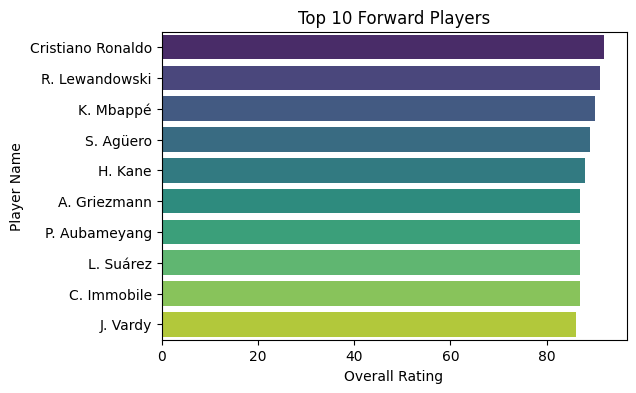

In [30]:
df['Primary Position'] = df['Positions'].apply(lambda x: x.split(',')[0])  # Choose the first position as primary
top_forwards = df[df['Primary Position'] == 'ST'].sort_values(by='OVA', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x = "OVA", y = "Name", data = top_forwards, palette = "viridis")
plt.title('Top 10 Forward Players')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.show()

<ipython-input-31-5196592ee38b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OVA', y='Name', data=top_midfielders, palette='viridis')


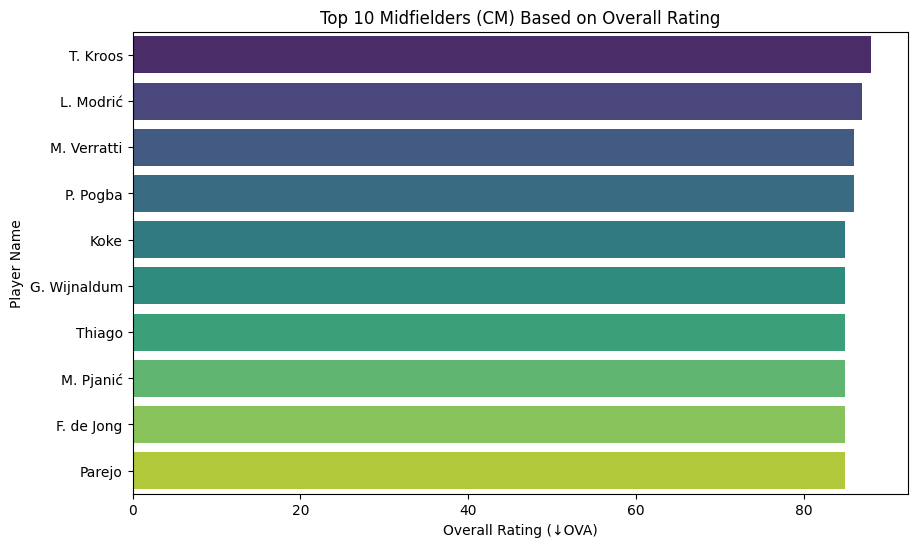

In [31]:
top_midfielders = df[df['Primary Position'] == 'CM'].sort_values(by='OVA', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='OVA', y='Name', data=top_midfielders, palette='viridis')
plt.title('Top 10 Midfielders (CM) Based on Overall Rating')
plt.xlabel('Overall Rating (↓OVA)')
plt.ylabel('Player Name')
plt.show()

Text(0.5, 1.0, 'Preferred Foot')

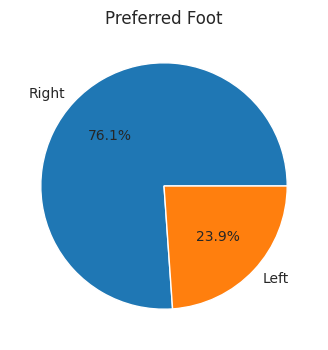

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.pie(df['Preferred Foot'].value_counts(), labels = df['Preferred Foot'].value_counts().index, autopct='%1.1f%%')
plt.title('Preferred Foot')

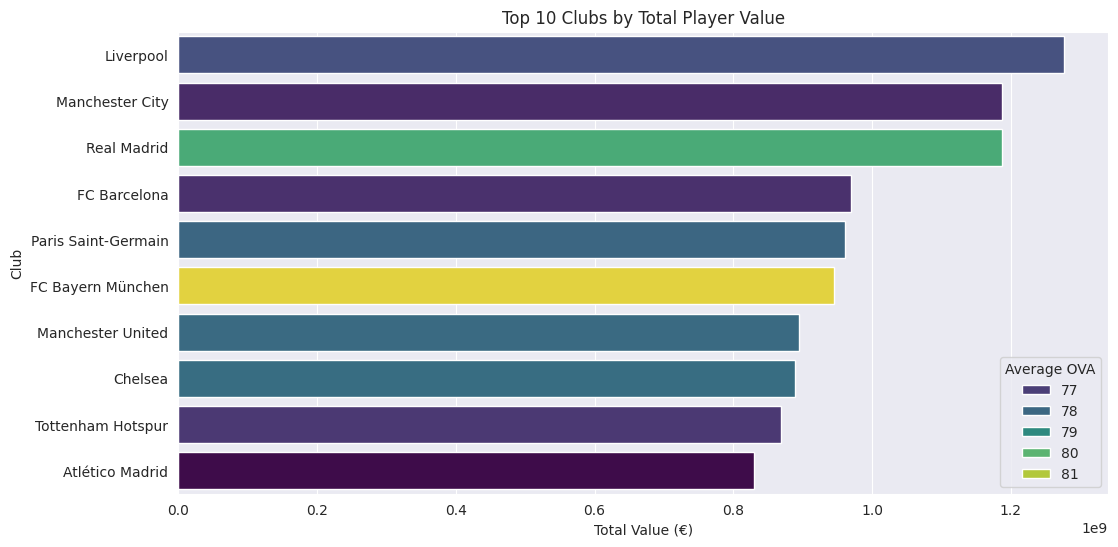

In [35]:
# Group data by Club and calculate total Value, total Wage, and average OVA
club_stats = df.groupby('Club').agg({
    'Value' : 'sum',
    'Wage' : 'sum',
    'OVA' : 'mean'
}).reset_index()

# Rename columns for clarity
club_stats.rename(columns = {
    'Value' : 'Total Value(€)',
    'Wage' : 'Total Wage(€)',
    'OVA' : 'Average OVA'
}, inplace = True)

# Display the top 10 clubs by Total Value
club_stats.sort_values(by = 'Total Value(€)', ascending = False ).head(10)
top_clubs = club_stats.sort_values(by='Total Value(€)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Value(€)', y='Club', data=top_clubs, palette='viridis', hue='Average OVA', dodge=False)

# Adding titles and labels
plt.title('Top 10 Clubs by Total Player Value')
plt.xlabel('Total Value (€)')
plt.ylabel('Club')
plt.legend(title='Average OVA', loc='lower right')

plt.show()